# Linear Regression with Python¶
```
Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:
```
- 'Avg. Area Income': Avg. Income of residents of the city house is located in.
- 'Avg. Area House Age': Avg Age of Houses in same city
- 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
- 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
- 'Area Population': Population of city house is located in
- 'Price': Price that the house sold at
- 'Address': Address for the house
#### Let's get started!

Check out the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!

## Import Libraries

In [1]:
# data analysis lib.
import pandas as pd
import numpy as np
# data visualization lib.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## Check out the Data

In [3]:
# lets check the info about the dataframe 'df' to know the total number of columns and rows
# as well as the type of the data in each column, the memory usage of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
# lets get quick information about the USA Housing dataframe columns like (mean, count, min, max) <only numerical cols>
df.describe().transpose() # the tranpose() method is just used to make it easier to read

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


In [5]:
# to get the names of the columns
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Now lets use some plots of the df dataframe

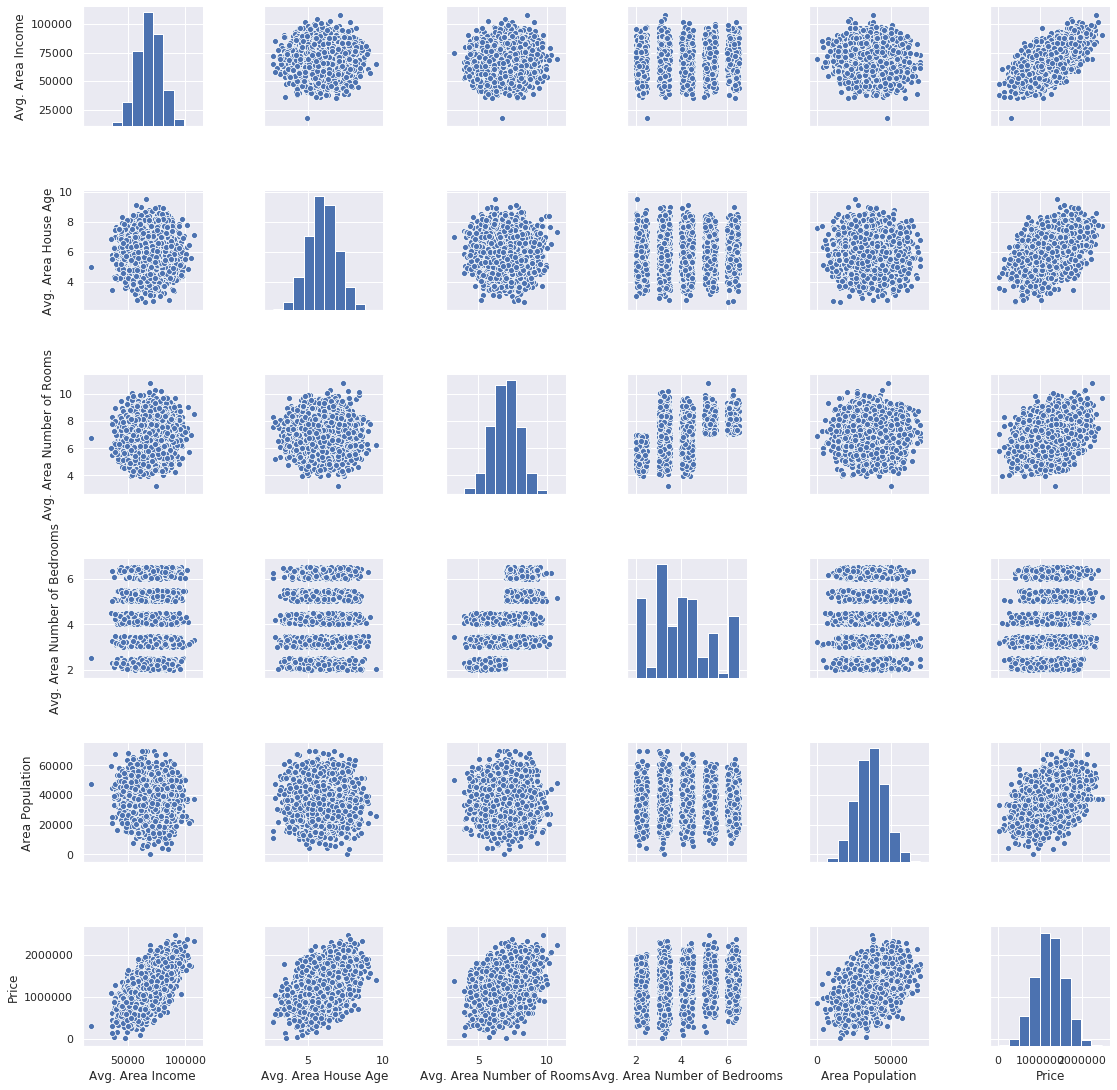

In [6]:
# Pairplot will not only create histograms but also the correlation scatter plots between the columns (nemerical)
sns.pairplot(data=df)

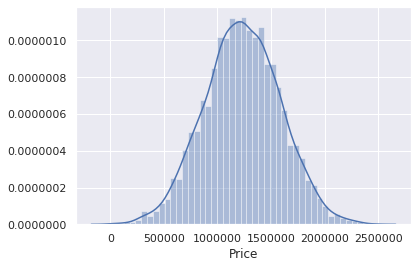

In [7]:
# Now lets create a distplot (Normally we do that for the Target column or what you wanna predict)
sns.distplot(a=df['Price'], hist=True, kde=True, rug=False) # we want to predict the price of the houses
# notice that the average price ranging from 1000000 to 1500000

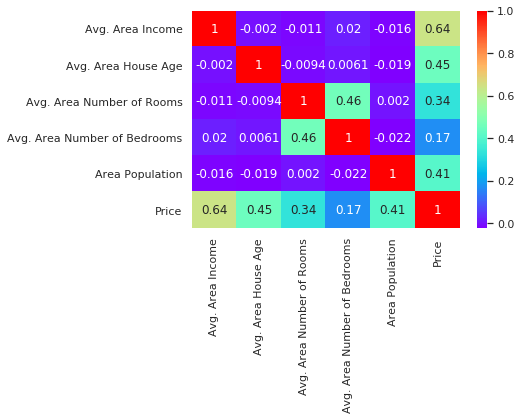

In [8]:
# Now lets create a heatmap to plot the correlation between the columns of the USA Housing dataframe 'df'
sns.heatmap(data=df.corr(), cmap='rainbow', annot=True)

## Training a Linear Regression Model
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [9]:
# So how to split our data, There are two methods
# 1- Using .iloc[row_index, columns_index]
X = df.iloc[:, :5]
y = df.iloc[:, 5]

In [10]:
# lets see X
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [11]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [12]:
# 2- using the names of the column directly
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [13]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y= df['Price']

In [14]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [15]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

## Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [16]:
# importing the train_test_split function from scikit learn (sklearn)
from sklearn.model_selection import train_test_split

In [17]:
# Now lets split our data (using tuple unpacking)
# to make sure that the random split is the same each time the cell runs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [18]:
X_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1303,68091.179676,5.364208,7.502956,3.10,44557.379656
1051,75729.765546,5.580599,7.642973,4.21,29996.018448
4904,70885.420819,6.358747,7.250241,5.42,38627.301473
931,73386.407340,4.966360,7.915453,4.30,38413.490484
4976,75046.313791,5.351169,7.797825,5.23,34107.888619


In [19]:
y_train.head()

1303    1.489648e+06
1051    1.183015e+06
4904    1.547889e+06
931     1.186442e+06
4976    1.340344e+06
Name: Price, dtype: float64

## Creating and Training the Model

In [20]:
# importing the linear regression estimator
from sklearn.linear_model import LinearRegression

In [21]:
# Now lets instantiate our LinearRegression Estimator
lm = LinearRegression()

In [22]:
# Fitting the model on the training data (Training the Model)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [23]:
# printing the intercept of our linear regression model
print("The intercept of model:lm is = {}".format(lm.intercept_))

The intercept of model:lm is = -2640159.796853739


In [24]:
# Now finding the coeffecients of our linear regression model:lm
# creating a data frame for the coeffecient for each feature in the Training dataset
coeff_df = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coeffecients'])
coeff_df
# so the coff. means: if one unit (1) increase in the Avg. Area Income with all other feature constant
# this means that the label -Price- will increase by 21.52 USD

,Coeffecients
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420



Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? [Check this video](https://youtu.be/JwGaos2Y9bM). If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):


```python
    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data
```


In [25]:
# Sklearn has some datasets that has a real data values and for example is the boston dataset (house prices)
# and here how you can load it
from sklearn.datasets import load_boston
boston = load_boston()
boston # this is actually a dictionary not a dataframe

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [26]:
boston.keys() # returns the keys of the dictionary:

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [27]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
# Splitting boston into an X,y dataset is easy as:
X_boston, y_boston = load_boston(return_X_y=True) 
X_boston.shape, y_boston.shape 

((506, 13), (506,))

In [30]:
X_boston_features = pd.DataFrame(data=X_boston, columns=[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']])

In [31]:
# lets do the same thing for the boston dataset
X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(X_boston, y_boston, test_size=0.4, random_state=101)
lm_boston = LinearRegression()
lm_boston.fit(X_boston_train, y_boston_train)
lm_boston.intercept_, lm_boston.coef_

(41.28149654473815,
 array([-7.75583711e-02,  4.20310157e-02,  9.11529473e-02,  4.13304932e+00,
        -1.99765575e+01,  2.89019042e+00,  1.61533256e-02, -1.26474745e+00,
         2.60170760e-01, -1.11251993e-02, -8.80555502e-01,  7.02445445e-03,
        -6.43482813e-01]))

In [32]:
# now lets create a dataframe out of the X_boston
coeff_boston = pd.DataFrame(lm_boston.coef_, index=[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']], columns=['Coeffecient'])
coeff_boston
# Notice that this is more reliable and actullay indicates a real information as increase in 'crime' decrease
# the price of the house

,Coeffecient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [33]:
predictions = lm.predict(X_test) # predict the prices of the houses based on the testing set features

In [35]:
predictions_df = pd.DataFrame(predictions,columns=['Predicted House Price'])
predictions_df

,Predicted House Price
0,1.260961e+06
1,8.275888e+05
2,1.742421e+06
3,9.746254e+05
4,9.987178e+05
...,...
1995,1.515043e+06
1996,7.460118e+05
1997,3.721914e+05
1998,1.365217e+06


In [56]:
# lets create a dataframe for the y_test dataset
y_test_ser = y_test.reset_index().drop(columns=['index'])
y_test_ser.columns = ['Actual House Price']
y_test_ser

,Actual House Price
0,1.251689e+06
1,8.730483e+05
2,1.696978e+06
3,1.063964e+06
4,9.487883e+05
...,...
1995,1.489520e+06
1996,7.777336e+05
1997,1.515271e+05
1998,1.343824e+06


In [58]:
# lets concatenate the predicted house prices with the actulal correct house prices
compare_actual_predicted_house_prices = pd.concat([predictions_df, y_test_ser], axis=1)
compare_actual_predicted_house_prices

,Predicted House Price,Actual House Price
0,1.260961e+06,1.251689e+06
1,8.275888e+05,8.730483e+05
2,1.742421e+06,1.696978e+06
3,9.746254e+05,1.063964e+06
4,9.987178e+05,9.487883e+05
...,...,...
1995,1.515043e+06,1.489520e+06
1996,7.460118e+05,7.777336e+05
1997,3.721914e+05,1.515271e+05
1998,1.365217e+06,1.343824e+06


Text(0.5, 1.0, 'Predictions vs. Actulal House Prices')

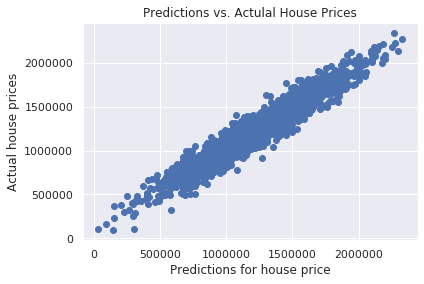

In [65]:
# For further Visual analysis we can plot a scatter plot for the 'predictions' and the actual ' y_test'
plt.scatter(y_test, predictions)
plt.xlabel('Predictions for house price')
plt.ylabel('Actual house prices')
plt.title('Predictions vs. Actulal House Prices')
# this plot is somehow simillar to a straight line which means that your predictions are good ^_^

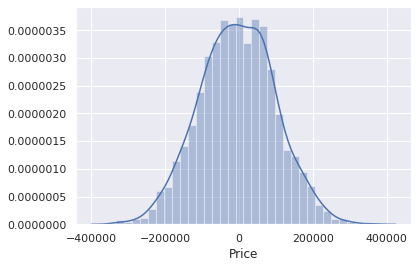

In [66]:
# Now lets create a hitogram for the distripution of our 
# residuals=difference between the (actual_values, predicted values)
# so here residuals = y_test - predictions
sns.distplot((y_test-predictions))
# notice that our distripution is normally distriputed which means that our model is a correct choice for the data
# if it was not a normally distriputed, look back to your data and check if the LinearRegression was the correct
# choice for the dataset.

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

**Note**: (Y)is the actual value and (Y-) is the predicted value

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them (**minimize the errors to create the best model**).

In [67]:
# We can calculate all of these Evaluation Metrics
from sklearn import metrics

In [69]:
# MAE: mean absolute_error
metrics.mean_absolute_error(y_true=y_test, y_pred=predictions)

82288.22251914928

In [70]:
# MSE: Mean Squared Error
metrics.mean_squared_error(y_true=y_test, y_pred=predictions)

10460958907.208244

In [72]:
# RMSE: Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=predictions))

102278.82922290538

## This was your first real Machine Learning Project! Congrats on helping your neighbor out!